In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("data_transformed.csv")
display(df.head())

,uid,PNRLocatorID,avg_amt,round_trip,group_size,group,days_pre_booked,BookingChannel_Other,BookingChannel_Outside_Booking,BookingChannel_Reservations_Booking,...,true_destination_dest_SXM,true_destination_dest_TPA,true_destination_dest_ZIH,UflyMemberStatus_Elite,UflyMemberStatus_non-ufly,UflyMemberStatus_Standard,seasonality_Q1,seasonality_Q2,seasonality_Q3,seasonality_Q4
0,504554455244696420493F7C2067657420746869732072...,AADMLF,0.019524,0,0.000,0,0.029703,0,1,0,...,0,0,0,0,0,1,0,0,0,1
1,46495853454E44696420493F7C20676574207468697320...,AAFBOM,0.081774,1,0.000,0,0.039604,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,534355545444696420493F7C2067657420746869732072...,AAFILI,0.026650,0,0.125,1,0.069307,0,0,0,...,0,0,0,0,1,0,1,0,0,0
3,534355545444696420493F7C2067657420746869732072...,AAFILI,0.026650,0,0.125,1,0.069307,0,0,0,...,0,0,0,0,1,0,1,0,0,0
4,44554D4D414E4E44696420493F7C206765742074686973...,AAFRQI,0.000000,1,0.000,0,0.035361,0,1,0,...,0,0,0,0,1,0,0,0,0,1


In [3]:
print(df.dtypes)

uid                           object
PNRLocatorID                  object
avg_amt                      float64
round_trip                     int64
group_size                   float64
                              ...   
UflyMemberStatus_Standard      int64
seasonality_Q1                 int64
seasonality_Q2                 int64
seasonality_Q3                 int64
seasonality_Q4                 int64
Length: 90, dtype: object


In [4]:
scaler = StandardScaler()
numeric_data_only = df.select_dtypes(include=["int64", "float64"])
scaled_data = scaler.fit_transform(numeric_data_only)

In [6]:
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(scaled_data)
labels = kmeans.labels_

In [7]:
print(df["Cluster"].value_counts().sort_index())

0     137
1    6854
2    3092
3     868
4    4193
Name: Cluster, dtype: int64


In [8]:
print("Cluster centers (scaled)")
print(kmeans.cluster_centers_)

Cluster centers (scaled)
[[ 1.64730254e+00  4.90165372e-01  3.03447432e-01  4.25012089e-01
   6.45723591e-01 -6.86324219e-02  1.27734166e-01  2.38427121e-01
  -8.62923561e-02 -1.56268813e-01 -1.93947472e-01  6.17282028e-02
  -1.53048829e-01 -2.06104053e-01 -1.03205487e-01  3.61638025e-01
   9.07528704e-02 -1.88192406e-01 -6.51462342e-02 -1.40761325e-02
  -1.52457349e-01 -2.23908954e-01 -6.14661459e-02 -1.62542546e-02
  -1.49125718e-01 -1.60647946e-01 -1.25004191e-01 -1.95591058e-01
  -1.19722832e-01 -1.10291202e-01 -4.52903322e-02  7.34908697e-01
  -1.04309389e-01 -7.98723064e-02 -8.12632222e-03 -2.29900245e-02
  -1.06867006e-01 -1.09676202e-01 -1.72985058e-01 -1.96861303e-01
  -2.15044884e-02 -2.43854089e-02 -1.62542546e-02 -4.74359089e-02
  -1.99086300e-02  1.04661428e+01 -1.88192406e-01 -2.45522817e-01
  -7.77515697e-02 -1.75399664e-01 -1.58472024e-01 -1.14927346e-02
  -1.11207629e-01 -3.63648385e-02 -1.81734093e-02 -2.19317611e-01
  -1.40949132e-01 -3.00467598e-01 -2.13465507e-01 -

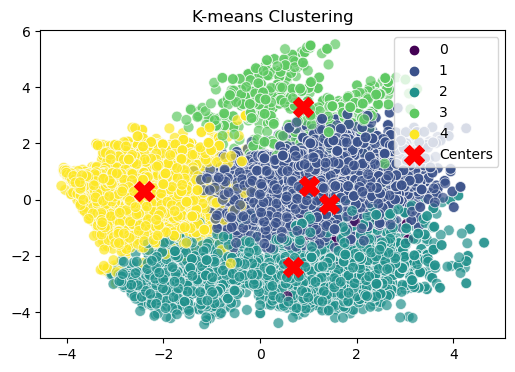

In [9]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(scaled_data)

plt.figure(figsize=(6,4))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=labels, 
                palette="viridis", alpha=0.7, s=60)
plt.scatter(pca.transform(kmeans.cluster_centers_)[:,0],
            pca.transform(kmeans.cluster_centers_)[:,1],
            c="red", marker="X", s=200, label="Centers")
plt.title("K-means Clustering")
plt.legend()
plt.show()

In [10]:
import pandas as pd

customer_data = pd.read_csv("original_data.csv")

clustered_data = df[["uid", "Cluster"]]

final_dataframe = customer_data.merge(clustered_data, on='uid', how='left')

C:\Users\USER\AppData\Local\Temp\ipykernel_26240\1810901762.py:3: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  customer_data = pd.read_csv("sample_data_transformed.csv")


In [11]:
for col in final_dataframe.columns:
    if final_dataframe[col].isna().any():
        print(col)

PostalCode
CardHolder
BookedProduct
EnrollDate
StopoverCode


In [12]:
final_dataframe.shape

(26575, 38)

In [13]:
key_cols = ["Age", "BaseFareAmt", "TotalDocAmt", "days_pre_booked"]

for col in key_cols:
    Q1 = final_dataframe[col].quantile(0.25)
    Q3 = final_dataframe[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    final_dataframe = final_dataframe[(final_dataframe[col] >= lower_bound) & (final_dataframe[col] <= upper_bound)]

final_dataframe.shape

(24106, 38)

In [14]:
final_dataframe.value_counts('Cluster')

Cluster
1    10933
4     6690
2     4692
3     1598
0      193
dtype: int64

In [ ]:
final_dataframe.to_excel("final_dataset_with_cluster.xlsx", index=False)

In [ ]:
final_dataframe.to_csv("final_dataset_with_cluster.csv", index=False)
print(final_dataframe.head())

In [ ]:
print(final_dataframe.columns)